<ipython-input-35-9d4a7af32147>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dataset = np.array([


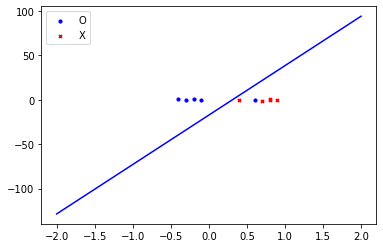

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import math

dataset = np.array([
((1, -0.4, 0.3), 0),
((1, -0.3, -0.1), 0),
((1, -0.2, 0.4), 0),
((1, -0.1, 0.1), 0),
((1, 0.6, -0.5), 0), #非線性分割點

((1, 0.8, 0.7), 1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6), 1)])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def average_gradient(model, data_set):
    gradient = np.zeros(len(model))
    for x, y in data_set:
        gradient += np.multiply((sigmoid(model.T.dot(x)) - y), x)
    return gradient / len(data_set)

def logistic_train(data_set):
    model = np.ones(len(data_set[0][0]))
    
    learning_rate = 1
    limit = 100
    for i in range(limit):
        model = model - learning_rate * average_gradient(model, data_set)
        learning_rate *= 0.97 
    return model

def logistic_predict(model, data):
    if sigmoid(model * data) > 0.5:
        return True
    else:
        return False

def logistic_predict_prob(model, data):
    return sigmoid(model * data)

def visulization(model):
    pass

w = logistic_train(dataset)

ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter([v[1] for v in ps[:5]], [v[2] for v in ps[:5]], s=10, c='b', marker="o", label='O')
ax1.scatter([v[1] for v in ps[5:]], [v[2] for v in ps[5:]], s=10, c='r', marker="x", label='X')
l = np.linspace(-2,2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.legend(loc='upper left');
plt.show()